<a href="https://cognitiveclass.ai"><img src = "https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/preview.jpg" width = 600> </a>

## Classification using Fully-Connected Networks
### The Quick, Draw! Dataset - <https://github.com/googlecreativelab/quickdraw-dataset>


In [0]:
import os
import zipfile

local_zip = '/content/apple_banana_or_strawberry.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
base_dir = '/content/apple_banana_or_strawberry'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               230500    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 231,219
Trainable params: 231,219
Non-trainable params: 0
_________________________________________________________________


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
test_datagen  = ImageDataGenerator()

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    color_mode='grayscale',
                                                    target_size=(28,28))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         color_mode='grayscale',
                                                         target_size=(28,28)) 

Found 6000 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [0]:
import datetime

callbacks = []

logdir = os.path.join("/content/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
callbacks.append(tensorboard_callback)

save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.hdf5', save_best_only=True)
callbacks.append(save_best_callback)

history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=300,
                              epochs=100,
                              validation_steps=20,
                              verbose=1,
                              callbacks=callbacks)

In [6]:
%load_ext tensorboard
%tensorboard --logdir='/content/logs'

Saving straw_laz.tif to straw_laz (1).tif


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


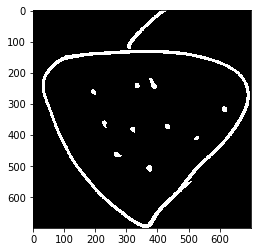

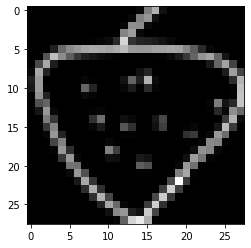




['apple', 'banana', 'strawberry']



Softmax Output: [[0.18595833 0.1520341  0.6620076 ]]



straw_laz.tif is a(n) strawberry





In [11]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(28, 28), grayscale=True, interpolation='bilinear')
  plt.imshow(image.load_img(path), cmap='gray')
  plt.show()
  plt.imshow(img, cmap='gray')
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  
  model = tf.keras.models.load_model('/content/best_weights.hdf5')
  classes_pred = model.predict(images, batch_size=10)
  classes = ['apple', 'banana', 'strawberry']
  print(f'\n\n\n{classes}')
  print(f'\n\n\nSoftmax Output: {classes_pred}')
  print(f'\n\n\n{fn} is a(n) {classes[classes_pred.argmax()]}\n\n\n')
 